Descripción de la Metrica Euclidiana


In [19]:
#Cargamos los datos
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

dataset_root = "../Input" #se para en una carpeta anterior de donde se encuentra el trabajo
dataset_faces94 = dataset_root + "/faces94" 
dataset_female = dataset_faces94 + "/female"
dataset_male = dataset_faces94 + "/male"
dataset_malestaff = dataset_faces94 + "/malestaff"

dataset_outliers = dataset_faces94 + "/Outliers" 

def readFaces94female (gray=False):
    return readImagesFromDataSet(dataset_female,gray)

def readFaces94male (gray=False):
    return readImagesFromDataSet(dataset_male,gray)

def readFaces94malestaff (gray=False):
    return readImagesFromDataSet(dataset_malestaff,gray)

def readoutliers (gray=False):
    return readImagesFromDataSet(dataset_outliers,gray)

def readImagesFromDataSet(datasetDir, gray=False):
    images = []
    directories = glob.glob(datasetDir + "/*")
    for directory in directories:
        images += readImagesFromDirectory(directory, gray)
    
    return np.array(images, dtype="float32")

def readImagesFromDirectory(directory, gray=False):
    images = []
    imageNames = glob.glob(directory + "/*.jp*")
    for imageName in imageNames:
        image = cv2.imread(imageName)
        images.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if gray else image)
        
    return images

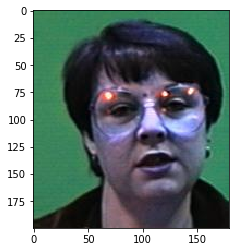

In [20]:


image2 = cv2.imread('9336923.1.jpg')
plt.imshow(image2, plt.cm.gray)

In [21]:
face94_female = readFaces94female(gray=True)
plt.imshow(face94_female[398], plt.cm.gray)
print(face94_female.shape)

ValueError: setting an array element with a sequence.

(399, 200, 180)
[[107.4411   107.67168  107.869675 ... 109.6391   109.44862  109.233086]
 [109.0802   109.233086 109.46616  ... 111.090225 110.809525 110.49123 ]
 [109.36341  109.451126 109.50626  ... 111.46115  111.17544  110.85464 ]
 ...
 [ 56.370926  55.278194  54.90727  ...  56.225563  56.298244  56.07268 ]
 [ 60.88722   59.        57.541355 ...  57.706768  57.85965   57.726818]
 [ 63.734337  60.969925  58.370926 ...  58.646618  59.017544  58.964912]]


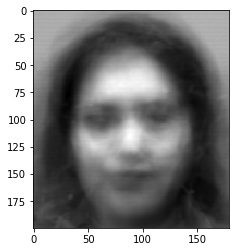

In [22]:
#Calculo de la Media 
N, alto, largo = face94_female.shape
print(face94_female.shape)
media_face=np.mean(face94_female, axis=0)
print(media_face)
plt.imshow(media_face, cmap=plt.cm.gray)

[[117. 118. 118. ... 121. 121. 120.]
 [120. 121. 121. ... 123. 122. 122.]
 [121. 121. 121. ... 123. 123. 122.]
 ...
 [ 28.  29.  31. ...  38.  37.  34.]
 [ 31.  31.  37. ...  33.  34.  35.]
 [ 34.  30.  30. ...  31.  31.  32.]]


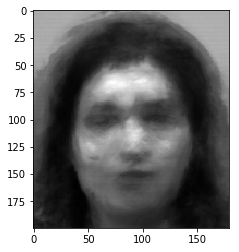

In [23]:
#calculo de la mediana
mediana_face=np.median(face94_female, axis=0)
print(mediana_face)
plt.imshow(mediana_face, cmap=plt.cm.gray)


(200, 180)
(399, 200, 180)


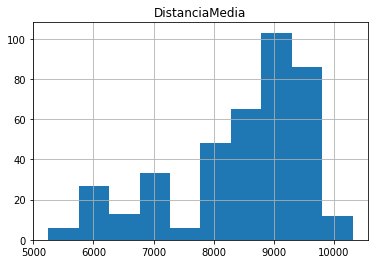

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd6037ada0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd60384470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd6037a978>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd60384b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd60384e48>],
 'means': []}

<Figure size 432x288 with 0 Axes>

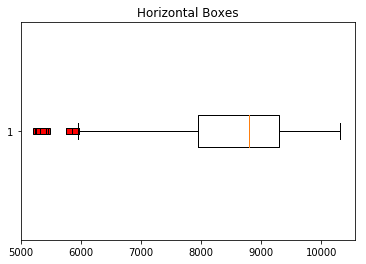

In [24]:
#calculo de la metrica contra la mediana y la media
distanciaMedia= np.linalg.norm(media_face-face94_female, ord=None, axis=(1,2), keepdims=False)
print(media_face.shape)
print(face94_female.shape)
#print(distanciaMedia)

#s se crea el histograma
plt.title('DistanciaMedia')
plt.hist(distanciaMedia)
plt.grid(True)
plt.show()
plt.clf()

# se crea el Boxplot
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Horizontal Boxes')
ax5.boxplot(distanciaMedia, vert=False, flierprops=red_square)



(array([], dtype=int64),)


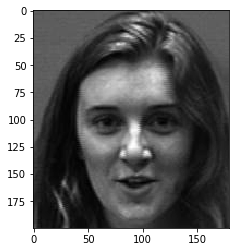

In [25]:
# se sacan los outliers
z = np.abs(stats.zscore(distanciaMedia))
#print(z)
outliers=np.where(z > 3)
print(outliers)

plt.imshow(face94_female[358], cmap=plt.cm.gray)

In [17]:
#Datos atipicos dentro de la muestra
distanciaMediana= np.linalg.norm(mediana_face-face94_female, ord=None, axis=(1,2), keepdims=False)

In [18]:
#Función de pertenencia Argumentos (A, Media/Mediana, Nueva Imagen)